# Necessary library imports

In [38]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import kurtosis, skew

# Reading in all the files

In [39]:
df2 = pd.read_csv('..//output//2v.csv')
df3 = pd.read_csv('..//output//3v.csv')
df4 = pd.read_csv('..//output//4v.csv')
df5 = pd.read_csv('..//output//5v.csv')
df6 = pd.read_csv('..//output//6v.csv')
df7 = pd.read_csv('..//output//7v.csv')
df8 = pd.read_csv('..//output//8v.csv')
df9 = pd.read_csv('..//output//9v.csv')
df10 = pd.read_csv('..//output//10v.csv')

# Assigning df to the file on which the analysis is to be done and n to the number of vertices the file is for (avoids redundant loading of files).

In [40]:
df, n = df3, 3

# Viewing the data

In [41]:
df.head()

,Graph_number,Number_of_vertices,starting_colour_vector,ending_colour_vector,step_time,cycle
0,1,3,"[1, 1, 1]","[1, 1, 1]",1,1
1,1,3,"[1, 1, -1]","[1, 1, 1]",2,1
2,1,3,"[1, -1, 1]","[1, 1, 1]",2,1
3,1,3,"[1, -1, -1]","[-1, -1, -1]",2,1
4,2,3,"[1, 1, 1]","[1, 1, 1]",1,1


# Obtaining the value counts for variables 'step_time', 'cycle', starting_colour_vector' and 'ending_colour_vector'

In [42]:
step_time_value_counts = df['step_time'].value_counts()
print(step_time_value_counts)

2    9
1    7
Name: step_time, dtype: int64


In [43]:
cycle_value_counts = df['cycle'].value_counts()
print(cycle_value_counts)

1    13
2     3
Name: cycle, dtype: int64


In [44]:
scv_value_counts = df['starting_colour_vector'].value_counts()
print(scv_value_counts)

[1, 1, 1]      4
[1, 1, -1]     4
[1, -1, 1]     4
[1, -1, -1]    4
Name: starting_colour_vector, dtype: int64


In [45]:
ecv_value_counts = df['ending_colour_vector'].value_counts()
print(ecv_value_counts)

[1, 1, 1]       10
[-1, -1, -1]     3
[1, -1, -1]      1
[1, -1, 1]       1
[1, 1, -1]       1
Name: ending_colour_vector, dtype: int64


# Converting the value counts for all the variables to percent form

In [46]:
step_time_value_counts_percent = dict(df.step_time.value_counts(normalize=True) * 100)
for k, v in step_time_value_counts_percent.items():
    step_time_value_counts_percent[k] = round(v, 1)

print(step_time_value_counts_percent)

{2: 56.2, 1: 43.8}


In [47]:
cycle_value_counts_percent = dict(df.cycle.value_counts(normalize=True) * 100)
for k, v in cycle_value_counts_percent.items():
    cycle_value_counts_percent[k] = round(v, 1)

print(cycle_value_counts_percent)

{1: 81.2, 2: 18.8}


In [48]:
scv_value_counts_percent = dict(df.starting_colour_vector.value_counts(normalize=True) * 100)
for k, v in step_time_value_counts_percent.items():
    step_time_value_counts_percent[k] = round(v, 1)

print(step_time_value_counts_percent)

{2: 56.2, 1: 43.8}


In [49]:
ecv_value_counts_percent = dict(df.ending_colour_vector.value_counts(normalize=True) * 100)
for k, v in ecv_value_counts_percent.items():
    ecv_value_counts_percent[k] = round(v, 1)

print(ecv_value_counts_percent)

{'[1, 1, 1]': 62.5, '[-1, -1, -1]': 18.8, '[1, -1, -1]': 6.2, '[1, -1, 1]': 6.2, '[1, 1, -1]': 6.2}


# Saving the percent form as a new column for further visualisation

In [50]:
df['percent_sp'] = df['step_time'].map(step_time_value_counts_percent)
df.head()

,Graph_number,Number_of_vertices,starting_colour_vector,ending_colour_vector,step_time,cycle,percent_sp
0,1,3,"[1, 1, 1]","[1, 1, 1]",1,1,43.8
1,1,3,"[1, 1, -1]","[1, 1, 1]",2,1,56.2
2,1,3,"[1, -1, 1]","[1, 1, 1]",2,1,56.2
3,1,3,"[1, -1, -1]","[-1, -1, -1]",2,1,56.2
4,2,3,"[1, 1, 1]","[1, 1, 1]",1,1,43.8


In [51]:
df['percent_cy'] = df['cycle'].map(cycle_value_counts_percent)
df.head()

,Graph_number,Number_of_vertices,starting_colour_vector,ending_colour_vector,step_time,cycle,percent_sp,percent_cy
0,1,3,"[1, 1, 1]","[1, 1, 1]",1,1,43.8,81.2
1,1,3,"[1, 1, -1]","[1, 1, 1]",2,1,56.2,81.2
2,1,3,"[1, -1, 1]","[1, 1, 1]",2,1,56.2,81.2
3,1,3,"[1, -1, -1]","[-1, -1, -1]",2,1,56.2,81.2
4,2,3,"[1, 1, 1]","[1, 1, 1]",1,1,43.8,81.2


In [52]:
df['percent_scv'] = df['starting_colour_vector'].map(scv_value_counts_percent)
df.head()

,Graph_number,Number_of_vertices,starting_colour_vector,ending_colour_vector,step_time,cycle,percent_sp,percent_cy,percent_scv
0,1,3,"[1, 1, 1]","[1, 1, 1]",1,1,43.8,81.2,25.0
1,1,3,"[1, 1, -1]","[1, 1, 1]",2,1,56.2,81.2,25.0
2,1,3,"[1, -1, 1]","[1, 1, 1]",2,1,56.2,81.2,25.0
3,1,3,"[1, -1, -1]","[-1, -1, -1]",2,1,56.2,81.2,25.0
4,2,3,"[1, 1, 1]","[1, 1, 1]",1,1,43.8,81.2,25.0


In [53]:
df['percent_ecv'] = df['ending_colour_vector'].map(ecv_value_counts_percent)
df.head()

,Graph_number,Number_of_vertices,starting_colour_vector,ending_colour_vector,step_time,cycle,percent_sp,percent_cy,percent_scv,percent_ecv
0,1,3,"[1, 1, 1]","[1, 1, 1]",1,1,43.8,81.2,25.0,62.5
1,1,3,"[1, 1, -1]","[1, 1, 1]",2,1,56.2,81.2,25.0,62.5
2,1,3,"[1, -1, 1]","[1, 1, 1]",2,1,56.2,81.2,25.0,62.5
3,1,3,"[1, -1, -1]","[-1, -1, -1]",2,1,56.2,81.2,25.0,18.8
4,2,3,"[1, 1, 1]","[1, 1, 1]",1,1,43.8,81.2,25.0,62.5


# Setting plotting style

In [54]:
sns.set_style("dark")
sns.despine()

<Figure size 432x288 with 0 Axes>

# Bar plot for variable step_time

Text(0, 0.5, 'percentage of step time')

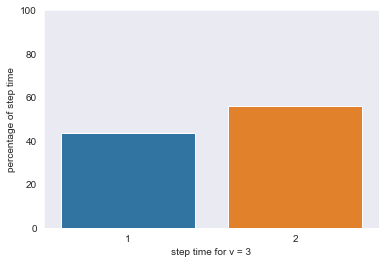

In [55]:
bar = sns.barplot(x=df['step_time'], y=df['percent_sp'], data=df)
bar.set(ylim=(0, 100))
bar.set_xlabel('step time for v = {}'.format(n))
bar.set_ylabel('percentage')

# Bar plot for variable cycle

Text(0, 0.5, 'percentage of cycle')

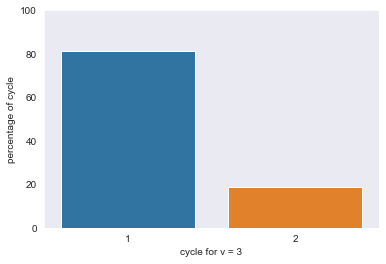

In [56]:
bar = sns.barplot(x=df['cycle'], y=df['percent_cy'], data=df)
bar.set(ylim=(0, 100))
bar.set_xlabel('cycle for v = {}'.format(n))
bar.set_ylabel('percentage')

# Bar plot for variable starting colour vector

Text(0, 0.5, 'percentage of scv')

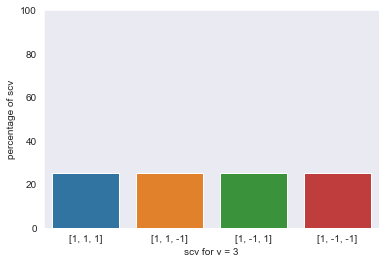

In [57]:
bar = sns.barplot(x=df['starting_colour_vector'], y=df['percent_scv'], data=df)
bar.set(ylim=(0, 100))
bar.set_xlabel('scv for v = {}'.format(n))
bar.set_ylabel('percentage')

# Bar plot for variable ending colour vector

Text(0, 0.5, 'percentage of ecv')

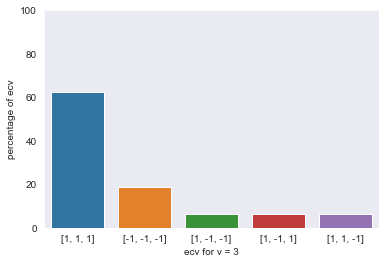

In [58]:
bar = sns.barplot(x=df['ending_colour_vector'], y=df['percent_ecv'], data=df)
bar.set(ylim=(0, 100))
bar.set_xlabel('ecv for v = {}'.format(n))
bar.set_ylabel('percentage')

# Variance, Mean, Skew and Kurtosis analysis for the following columns

## Step_time

C:\Users\sansk\anaconda3\envs\dataSci\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


mean :  50.775
var  :  37.83937500000004
skew :  -0.251976315339484
kurt :  -1.9365079365079367


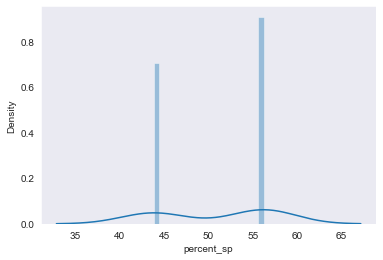

In [59]:
var = np.var(df['percent_sp'])
mean = df['percent_sp'].mean()
sns.distplot(df['percent_sp'], bins=20)


print("mean : ", mean)
print("var  : ", var)
print("skew : ",skew(df['percent_sp']))
print("kurt : ",kurtosis(df['percent_sp']))

## Cycle

mean :  69.5
var  :  593.19
skew :  -1.6012815380508714
kurt :  0.5641025641025643


C:\Users\sansk\anaconda3\envs\dataSci\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


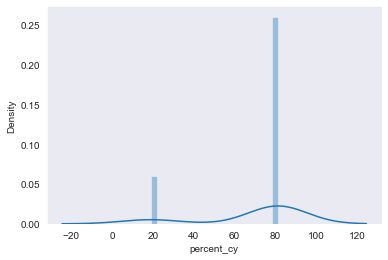

In [60]:
var = np.var(df['percent_cy'])
mean = df['percent_cy'].mean()
sns.distplot(df['percent_cy'], bins=20)


print("mean : ", mean)
print("var  : ", var)
print("skew : ",skew(df['percent_cy']))
print("kurt : ",kurtosis(df['percent_cy']))

## Starting colour vector

C:\Users\sansk\anaconda3\envs\dataSci\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sansk\anaconda3\envs\dataSci\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


mean :  25.0
var  :  0.0
skew :  0.0
kurt :  -3.0


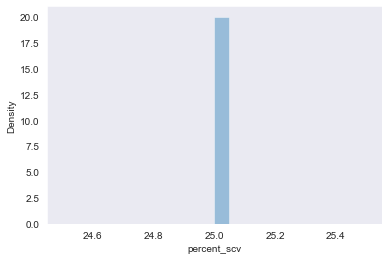

In [61]:
var = np.var(df['percent_scv'])
mean = df['percent_scv'].mean()
sns.distplot(df['percent_scv'], bins=20)


print("mean : ", mean)
print("var  : ", var)
print("skew : ",skew(df['percent_scv']))
print("kurt : ",kurtosis(df['percent_scv']))

## Ending colour vector

C:\Users\sansk\anaconda3\envs\dataSci\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


mean :  43.75
var  :  600.82125
skew :  -0.5920755912080032
kurt :  -1.55208943176539


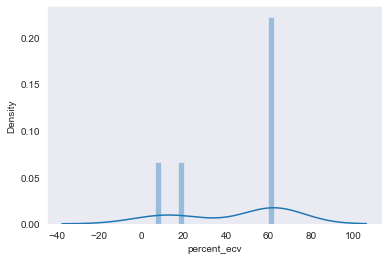

In [62]:
var = np.var(df['percent_ecv'])
mean = df['percent_ecv'].mean()
sns.distplot(df['percent_ecv'], bins=20)


print("mean : ", mean)
print("var  : ", var)
print("skew : ",skew(df['percent_ecv']))
print("kurt : ",kurtosis(df['percent_ecv']))